In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2]:
# Reading the data into Data Frame
df = pd.read_csv(r'C:\Users\w10\Downloads\Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [5]:
# Removing unwanted spaces from the column names
df.columns = df.columns.str.replace(' ', '')

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [7]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [8]:
# Dropping unwanted Rows by index
df.drop(df.index[122:125], inplace = True)

In [9]:
df[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [10]:
#"""Dropping the specific rows as we have two diffrent regions in the data an hence created a new column region which represents
#"Bejaia Region Dataset as 0 and Sidi-Bel Abbes Region Dataset as 1""""
df.loc[df.index[:122], 'Region'] = "0"
df.loc[df.index[122:], 'Region'] = "1"

In [11]:
#Showing top 5 rows
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 38.6+ KB


In [13]:
#As per the data set all the features except the "Classes" all are numerical features, hence converting them to the numerical features..
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)

In [14]:
#Summary of Data Set
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.027049
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.426385
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [15]:
#Checking the Null values in data set
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [16]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [17]:
df['Classes'] = df.Classes.str.replace(' ', '')

In [18]:
# Filling the single NA value as we have one NA value and considering the mode as this is the categorical variable.
df['Classes'].fillna(df['Classes'].mode()[0], inplace= True)

In [19]:
#Replacing Not fire as 0 and Fire as 1

df.replace({"Classes": {"fire": 1, "notfire": 0}}, inplace=True)

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [21]:
#Checking the Correlation
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350922,0.201784
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.083098,0.022333
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.563014,0.518119
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.575599,-0.435023
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.031308,-0.066529
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324003,-0.379449
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.689317,0.770114
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875854,0.584188
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.739417,0.507122


<AxesSubplot:>

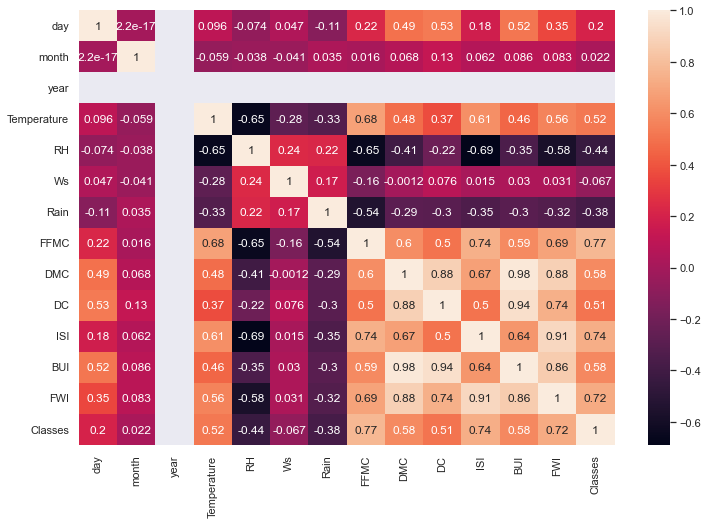

In [22]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(),annot= True)

C:\Users\w10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\w10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\w10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

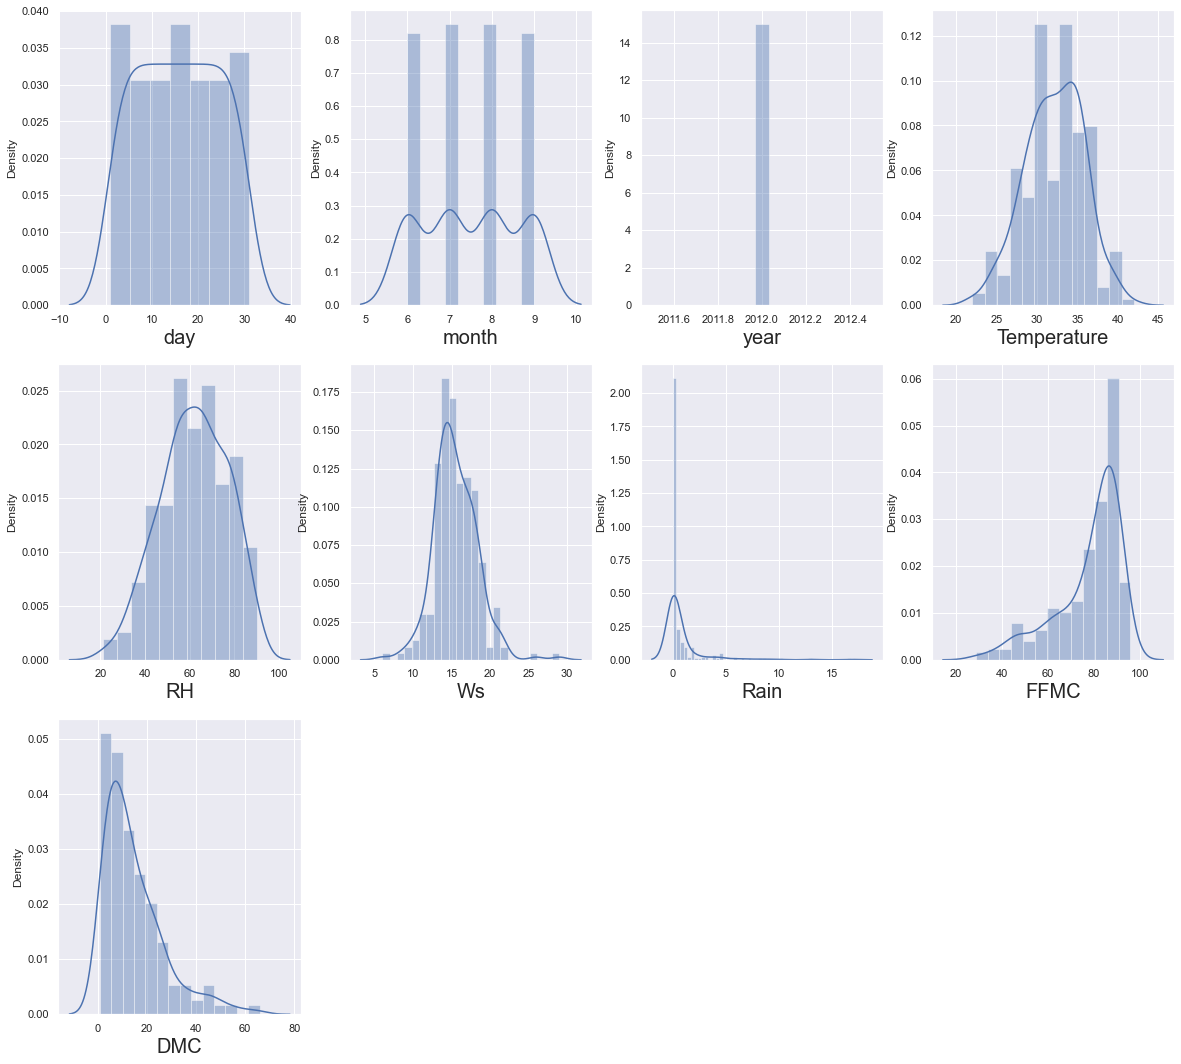

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :    
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

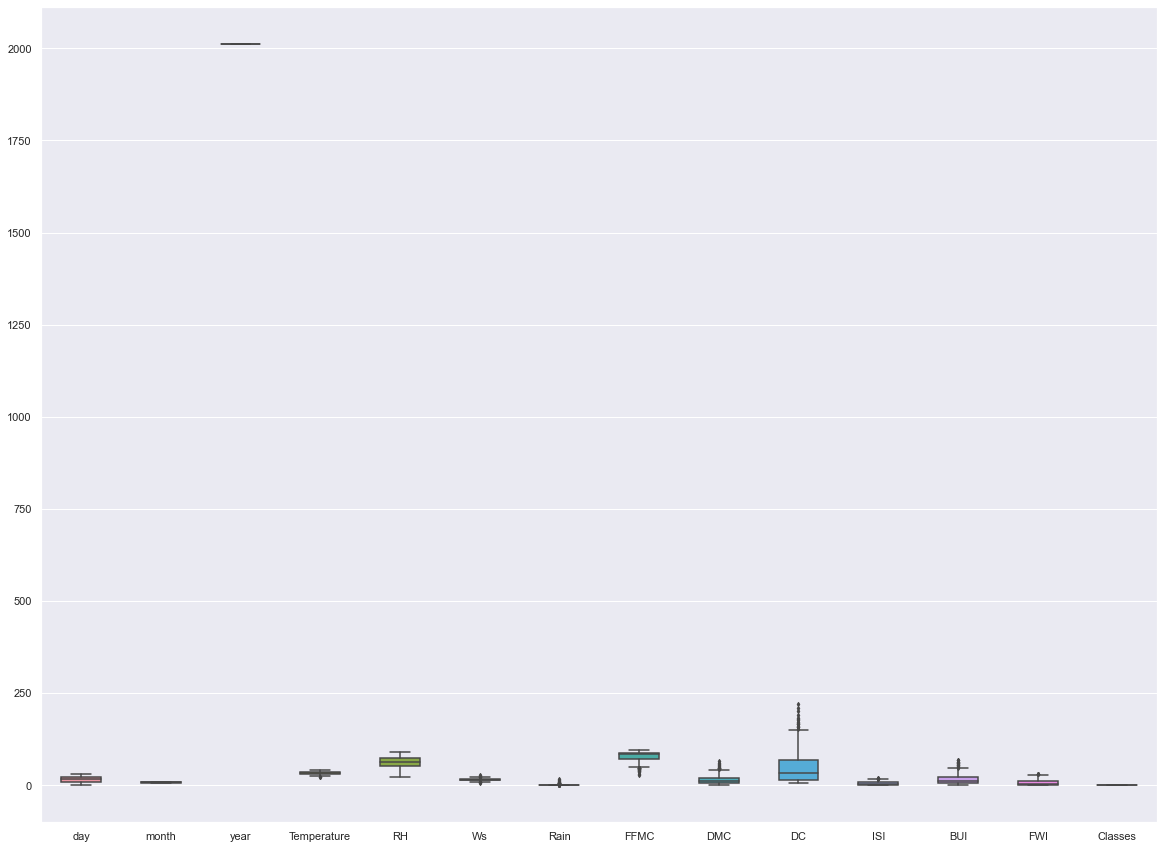

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [25]:
# Percentage of the Fire and Not fire in data set to know if our data set is imbalanced or not.
df.Classes.value_counts(normalize=True)*100

1    56.557377
0    43.442623
Name: Classes, dtype: float64

Note: As per the above figures the data set is not imbalanced

In [26]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [27]:
#Independent and Dependent Features

X= df[['Temperature','RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI','Region']]
y= df['Classes']

In [28]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
243,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    0
244    0
245    0
246    0
Name: Classes, Length: 244, dtype: int64

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [31]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
114,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,0
135,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1
210,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1
165,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0
182,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,9.0,1


In [32]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
156,33,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1
214,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1
201,40,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1
...,...,...,...,...,...,...,...,...,...,...,...
183,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0
56,36,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3,0
128,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1


In [33]:
scaler= StandardScaler()

In [34]:
scaler

StandardScaler()

In [35]:
X_train= scaler.fit_transform(X_train)

In [36]:
X_test= scaler.transform(X_test)

In [37]:
log_reg= LogisticRegression()

In [38]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [39]:
#Prediction for the test data

log_pred= log_reg.predict(X_test)

In [40]:
log_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [41]:
accuracy= accuracy_score(y_test,log_pred)

In [48]:
print("The Acuracy is: ",accuracy)

The Acuracy is:  0.9753086419753086


Accuracy
The mathematical formula is :

Accuracy=  (TP+TN)(TP+TN+FP+FN) 
Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications.

In [49]:
print("Training Score is:",log_reg.score(X_train, y_train))
print("Test Score is:",log_reg.score(X_test,y_test))

Training Score is: 0.9693251533742331
Test Score is: 0.9753086419753086


In [44]:
#Confusion Matrix

conf_mat=confusion_matrix(y_test,log_pred)
conf_mat

array([[28,  0],
       [ 2, 51]], dtype=int64)

In [45]:
#Precision

precision= precision_score(y_test,log_pred)
precision

1.0

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision= TP(TP+FP)

In [46]:
#Recall

recall= recall_score(y_test,log_pred)
recall

0.9622641509433962

The mathematical formula is:

Recall=  TP(TP+FN) 
Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.

In [47]:
#F1 Score

F1_score= 2*(recall*precision)/(recall+precision)
F1_score

0.9807692307692307

F1 Score
From the previous examples, it is clear that we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall.

The mathematical formula is: F1 score=  2∗((Precision∗Recall)(Precision+Recall))